<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados I
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Pacote Seaborn;</li>
  <li>Categorias: Gráficos de Barras e de Setores;</li>
  <li>Tendências: Gráficos de Linha e de Área.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preço do diamante por tipo de corte

In [163]:
import pandas as pd
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [164]:
#escolhendo as colunas que serão utilizadas

diamonds = data[['cut','price']].groupby('cut').agg('sum').reset_index()
diamonds.head()

,cut,price
0,Ideal,74513487
1,Premium,63221498
2,Very Good,48107623
3,Good,19275009
4,Fair,7017600


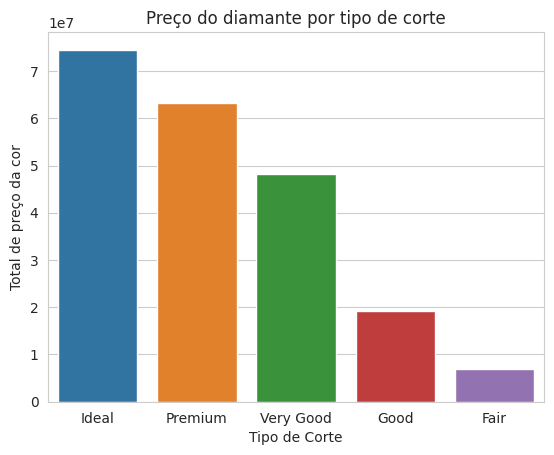

In [165]:
#criando o gráfico

with sns.axes_style('whitegrid'):

  grafico = sns.barplot(data=diamonds, x="cut", y="price", order=diamonds['cut'], palette="tab10")
  grafico.set(title='Preço do diamante por tipo de corte', xlabel='Tipo de Corte', ylabel='Total de preço da cor');

**Insight do gráfico 1**: Com esse gráfico de barras pode-se perceber que o corte "Ideal" foi o que gerou o maior valor na soma da coluna "price".


## 1.1\. Total de diamantes por tipo de coloração(bônus)

In [166]:
# gráfico do exercício 1.1

#selecionando informações que serão utilizadas no gráfico
diamonds_cor = data[['color', 'price']].groupby('color').agg('count').reset_index()

#aplicando "sort_values" para colocar valores crescentes
diamonds_cor = diamonds_cor.sort_values(by='price', ascending=True)

#mostrando dados
diamonds_cor.head()

,color,price
6,J,2808
5,I,5422
0,D,6775
4,H,8304
2,F,9542


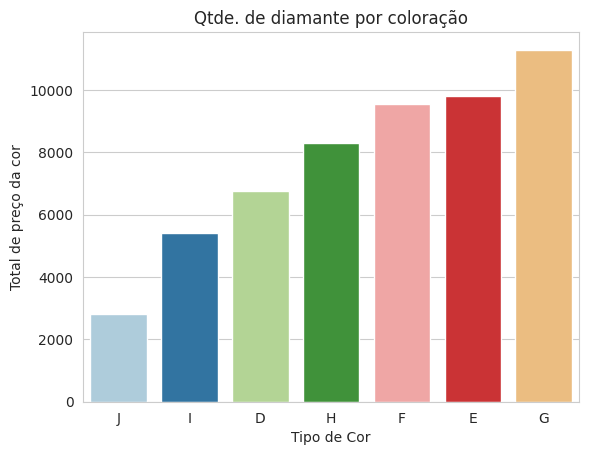

In [167]:
with sns.axes_style('whitegrid'):

  grafico = sns.barplot(data=diamonds_cor, x="color", y="price", order=diamonds_cor['color'], palette="Paired")
  grafico.set(title='Qtde. de diamante por coloração', xlabel='Tipo de Cor', ylabel='Total de preço da cor');

**Insight do gráfico 1.1**: Com esse gráfico é possível observar que o tipo de cor "G" está em maior quantidade na base disponibilizada, possuindo mais de 10 mil diamantes com a cor "G".

---

## 2\. Número de passageiros em dezembro por ano

In [168]:
import seaborn as sns
import pandas as pd
data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


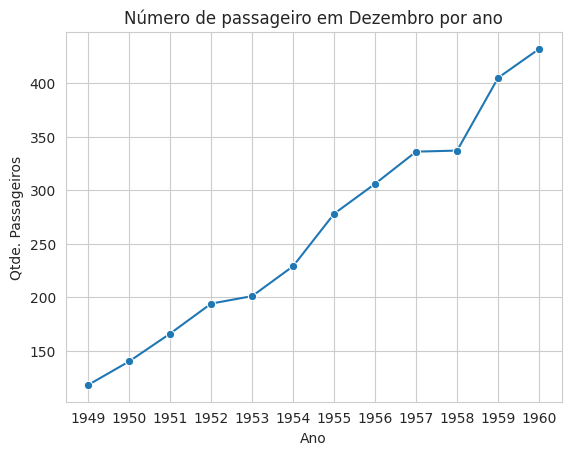

In [169]:
# gráfico do exercício 2

#filtrando somente Dezembro nos meses(também é possível fazer usando query)
flishts = data[data["month"] == 'Dec']


# Criando o gráfico de linha
with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=flishts, x="year", y="passengers", marker='o')
  grafico.set(title='Número de passageiro em Dezembro por ano', xlabel='Ano', ylabel='Qtde. Passageiros');

  # Ajustando a escala do eixo x para incluir todos os anos

  grafico.set(xticks=flishts['year'])



**Insight do gráfico 2**: Com base no gráfico, é possível perceber que existe um aumento constante em relação a quantidade de passageiros que viajam em dezembro, além disso houve um "salto" considéral entre os anos de 1958 e 1959, talvez tenha acontecido alguma promoção boa nesse ano o que pode ter acarretado esse crescimento.

---

## 3\. Numero de passageiros por mês entre 1949 e 1959

In [170]:
import seaborn as sns

data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


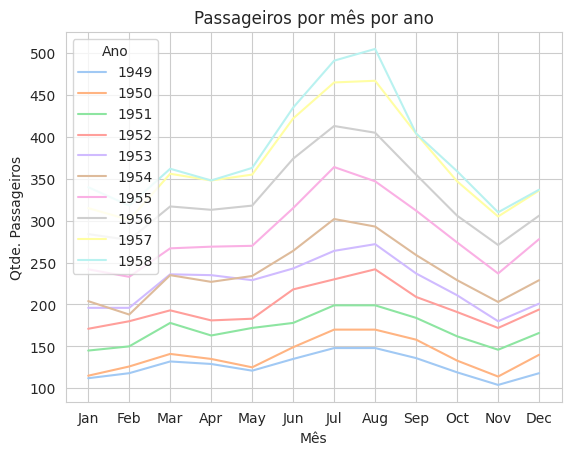

In [171]:
# gráfico do exercício 3

#fazendo uma "query" para selecionar somente os anos entre 1949 e 1959.
flights = data.query(("1949 <= year < 1959"))

with sns.axes_style('whitegrid'):

  grafico = sns.lineplot(data=flights, x="month", y="passengers", hue="year", palette="pastel")
  grafico.set(title='Passageiros por mês por ano', xlabel='Mês', ylabel='Qtde. Passageiros');
  grafico.get_legend().set_title("Ano");

**Insight do gráfico 3**: Podemos perceber que entre julho e agosto existe um pico de passageiros, e isso é comum em todos os anos analisados, provavelmente existe essa alta por conta das férias.

---